# 2. Random Numbers and Probability

In this chapter, you'll learn how to generate random samples and measure chance using probability. You'll work with real-world sales data to calculate the probability of a salesperson being successful. Finally, you’ll use the binomial distribution to model events with binary outcomes.

### With or without replacement?

In the video, you learned about two different ways of taking samples: with replacement and without replacement. Although it isn't always easy to tell which best fits various situations, it's important to correctly identify this so that any probabilities you report are accurate. In this exercise, you'll put your new knowledge to the test and practice figuring this out.

For each scenario, decide whether it's sampling with replacement or sampling without replacement.

|With replacement|Without replacement|
| --- | --- |
|Rolling a dice twice|Randomly picking 3 people to work on the weekend from a group of 20 people.|
|Flipping  a coin 3 times|Randomly selecting 5 products from the assembly line to test for quality assurance|
| |From a deck of cards, dealing 3 players 7 cards each|

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
amir_deals = pd.read_csv("datasets/amir_deals.csv")
amir_deals.head()

,Unnamed: 0,product,client,status,amount,num_users
0,1,Product F,Current,Won,7389.52,19
1,2,Product C,New,Won,4493.01,43
2,3,Product B,New,Won,5738.09,87
3,4,Product I,Current,Won,2591.24,83
4,5,Product E,Current,Won,6622.97,17


### Calculating probabilities

You're in charge of the sales team, and it's time for performance reviews, starting with Amir. As part of the review, you want to randomly select a few of the deals that he's worked on over the past year so that you can look at them more deeply. Before you start selecting deals, you'll first figure out what the chances are of selecting certain deals.

Recall that the probability of an event can be calculated by
$$P(\text{event}) = \frac{\text{\# ways event can happen}}{\text{total \# of possible outcomes}}$$


Count the number of deals Amir worked on for each `product` type and store in `counts`.

In [3]:
# Count the deals for each product
counts = amir_deals["product"].value_counts()
print(counts)

product
Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: count, dtype: int64


Calculate the probability of selecting a deal for the different product types by dividing the counts by the total number of deals Amir worked on. Save this as `probs`.

In [4]:
# Calculate probability of picking a deal with each product
probs = counts / counts.sum()
print(probs)

product
Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: count, dtype: float64


Question:

If you randomly select one of Amir's deals, what's the probability that the deal will involve Product C?

In [5]:
print(f"{0.084270 *100}%")

8.427%


### Sampling deals

In the previous exercise, you counted the deals Amir worked on. Now it's time to randomly pick five deals so that you can reach out to each customer and ask if they were satisfied with the service they received. You'll try doing this both with and without replacement.

Additionally, you want to make sure this is done randomly and that it can be reproduced in case you get asked how you chose the deals, so you'll need to set the random seed before sampling from the deals.

- Set the random seed to `24`.
- Take a sample of 5 deals without replacement and store them as `sample_without_replacement`.

In [6]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)

     Unnamed: 0    product   client status   amount  num_users
127         128  Product B  Current    Won  2070.25          7
148         149  Product D  Current    Won  3485.48         52
77           78  Product B  Current    Won  6252.30         27
104         105  Product D  Current    Won  4110.98         39
166         167  Product C      New   Lost  3779.86         11


Take a sample of 5 deals with replacement and save as `sample_with_replacement`.

In [7]:
# Set random seed
np.random.seed(24)

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace=True)
print(sample_with_replacement)

     Unnamed: 0    product   client status   amount  num_users
162         163  Product D  Current    Won  6755.66         59
131         132  Product B  Current    Won  6872.29         25
87           88  Product C  Current    Won  3579.63          3
145         146  Product A  Current    Won  4682.94         63
145         146  Product A  Current    Won  4682.94         63


Question:
What type of sampling is better to use for this situation?
 - With replacement
 - Without replacement (✔)
 - It doesn't matter 

### Discrete distributions

### Creating a probability distribution
A new restaurant opened a few months ago, and the restaurant's management wants to optimize its seating space based on the size of the groups that come most often. On one night, there are 10 groups of people waiting to be seated at the restaurant, but instead of being called in the order they arrived, they will be called randomly. In this exercise, you'll investigate the probability of groups of different sizes getting picked first. Data on each of the ten groups is contained in the restaurant_groups DataFrame.

Remember that expected value can be calculated by multiplying each possible outcome with its corresponding probability and taking the sum. 

In [9]:
restaurant_groups_dict = {
    "group": ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"],
    "group_size": [2, 4, 6, 2, 2, 2, 3, 2, 4, 2],
}
restaurant_groups = pd.DataFrame.from_dict(restaurant_groups_dict)
print(restaurant_groups)

  group  group_size
0     A           2
1     B           4
2     C           6
3     D           2
4     E           2
5     F           2
6     G           3
7     H           2
8     I           4
9     J           2


Create a histogram of the group_size column of `restaurant_groups`, setting bins to `[2, 3, 4, 5, 6]`. Remember to show the plot.

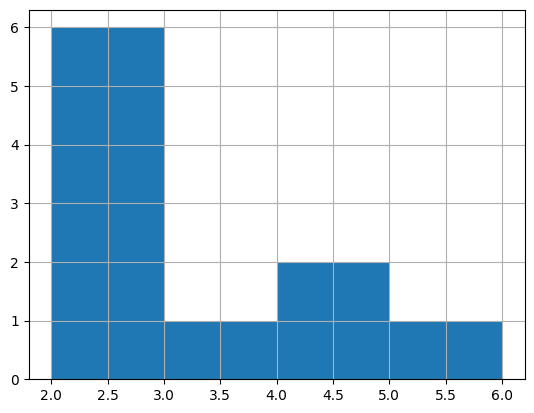

In [21]:
# Create a histogram of restaurant_groups and show plot
restaurant_groups["group_size"].hist(bins=[2, 3, 4, 5, 6])
plt.show()

Count the number of each `group_size` in `restaurant_groups`, then divide by the number of rows in `restaurant_groups` to calculate the probability of randomly selecting a group of each size. Save as `size_dist`.
Reset the index of `size_dist`.
Rename the columns of `size_dist` to `group_size` and prob.

In [33]:
# Create probability distribution
size_dist = restaurant_groups["group_size"].value_counts() / restaurant_groups.shape[0]
# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ["group_size", "prob"]

Calculate the expected value of the `size_distribution`, which represents the expected group size, by multiplying the `group_size` by the prob and taking the sum.

In [34]:
# Calculate expected value
expected_value = np.sum(size_dist["group_size"] * size_dist["prob"])
print(expected_value)

2.9000000000000004


Calculate the probability of randomly picking a group of 4 or more people by subsetting for groups of size 4 or more and summing the probabilities of selecting those groups.

In [35]:
# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist["group_size"]>=4]

# Sum the probabilities of groups_4_or_more
prob_4_or_more = groups_4_or_more['prob'].sum()
print(prob_4_or_more)

0.30000000000000004


### Identifying distributions
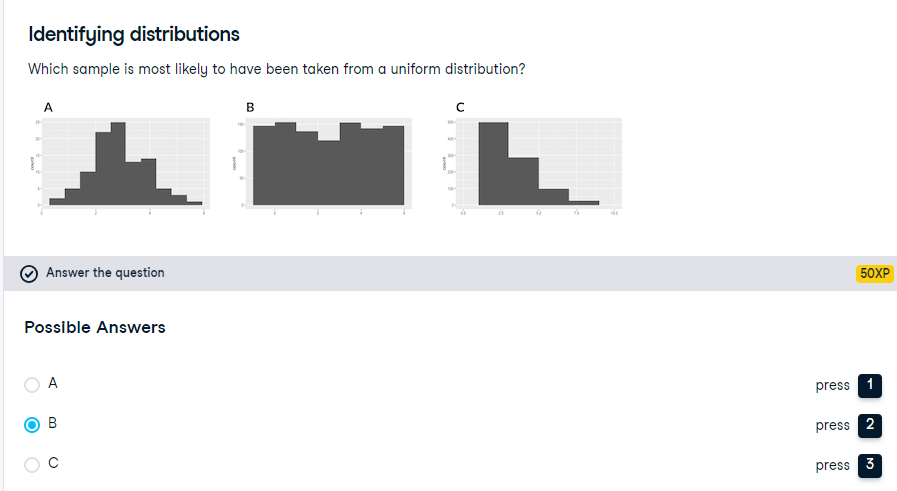

### Continuous distributions